In [117]:
import pandas as pd
import numpy as np

In [118]:
movie_data = pd.read_csv('csv-files\\movie_metadata_1.csv')

In [119]:
movie_data.head(1)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000


In [120]:
# total rows and cols
movie_data.shape

(5043, 28)

In [121]:
# name of all the columns 
movie_data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

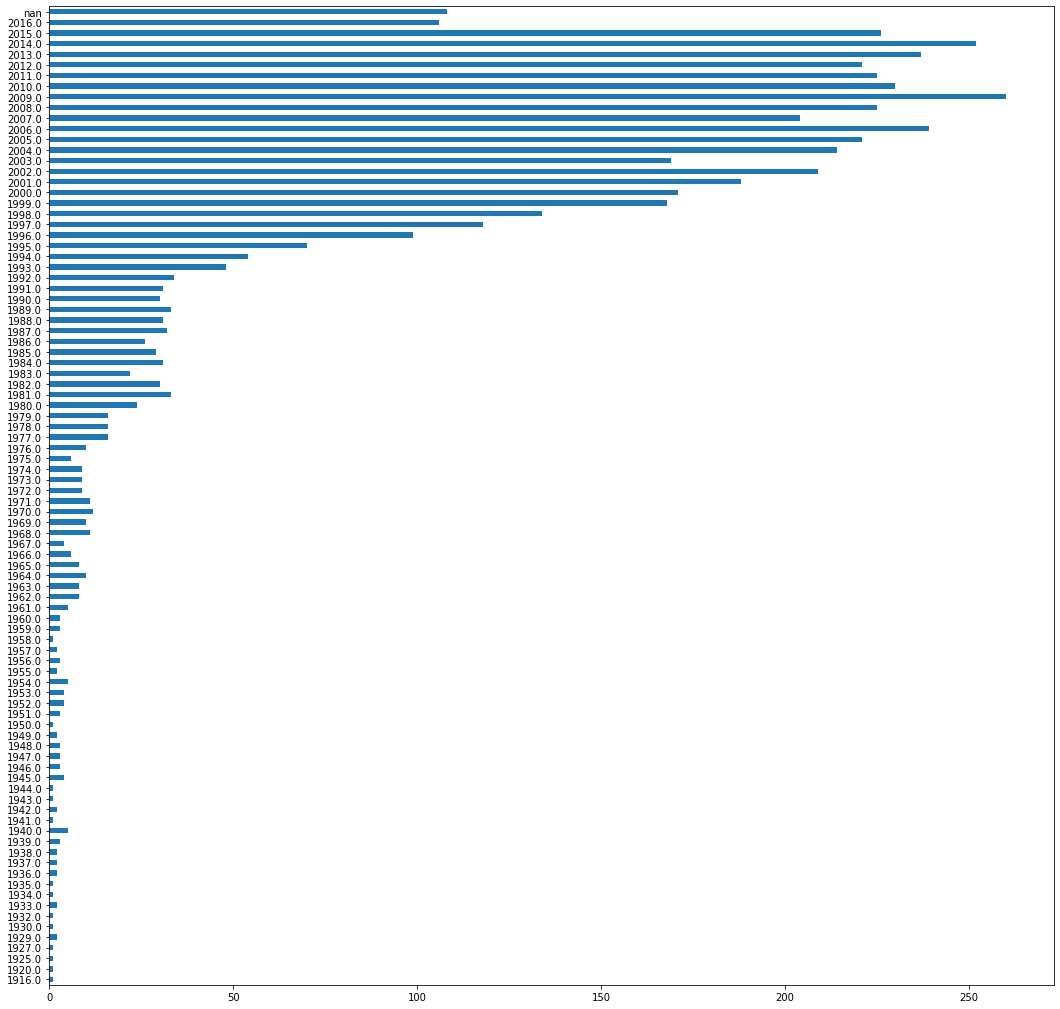

In [122]:
import matplotlib.pyplot as plt
movie_data.title_year.value_counts(dropna = False).sort_index().plot(kind='barh',figsize=(18,18))
plt.show()

### Modifying the data frame by keeping only the required columns

In [123]:
movie_data = movie_data[['director_name','actor_1_name','actor_2_name','actor_3_name','genres','plot_keywords','movie_title']]
movie_data.head(1)

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,plot_keywords,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,avatar|future|marine|native|paraplegic,Avatar


### Handling missing values

In [124]:
movie_data.isna().sum()

director_name    104
actor_1_name       7
actor_2_name      13
actor_3_name      23
genres             0
plot_keywords    153
movie_title        0
dtype: int64

In [125]:
movie_data['director_name'] = movie_data['director_name'].replace(np.nan,'unknown')
movie_data['actor_1_name'] = movie_data['actor_1_name'].replace(np.nan,'unknown')
movie_data['actor_2_name'] = movie_data['actor_2_name'].replace(np.nan,'unknown')
movie_data['actor_3_name'] = movie_data['actor_3_name'].replace(np.nan,'unknown')
movie_data['plot_keywords'] = movie_data['plot_keywords'].replace(np.nan,'')

### We have this unknown symbol at the end of each movie title string

In [126]:
movie_data.movie_title[0]


'Avatar\xa0'

- To solve this, we will run the following code


In [127]:
movie_data['movie_title']=movie_data['movie_title'].apply(lambda x:x[0:-1])
movie_data.movie_title[0]

'Avatar'

### Replacing the pipe symbol (' | ') with empty space (' ')

In [128]:
movie_data['genres'] = movie_data['genres'].apply(lambda x:x.replace('|',' '))
movie_data['plot_keywords'] = movie_data['plot_keywords'].apply(lambda x:x.replace('|',' '))


In [129]:
movie_data.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,plot_keywords,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar future marine native paraplegic,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,goddess marriage ceremony marriage proposal pi...,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,bomb espionage sequel spy terrorist,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,deception imprisonment lawlessness police offi...,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,,Star Wars: Episode VII - The Force Awakens ...


### Removing spaces between names

In [130]:
movie_data['director_name']=movie_data['director_name'].apply(lambda x:x.replace(" ",""))
movie_data['actor_1_name']=movie_data['actor_1_name'].apply(lambda x:x.replace(" ",""))
movie_data['actor_2_name']=movie_data['actor_2_name'].apply(lambda x:x.replace(" ",""))
movie_data['actor_3_name']=movie_data['actor_3_name'].apply(lambda x:x.replace(" ",""))

In [131]:
movie_data.head(1)

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,plot_keywords,movie_title
0,JamesCameron,CCHPounder,JoelDavidMoore,WesStudi,Action Adventure Fantasy Sci-Fi,avatar future marine native paraplegic,Avatar


### Concatenating all tags

In [132]:
movie_data['tags'] = movie_data['actor_1_name'] + ' '+ movie_data['actor_2_name'] + ' '+ movie_data['actor_3_name'] + ' '+ movie_data['director_name']+ ' ' + movie_data['genres'] + ' ' + movie_data['plot_keywords'] 

In [133]:
movie_data.head(1)

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,plot_keywords,movie_title,tags
0,JamesCameron,CCHPounder,JoelDavidMoore,WesStudi,Action Adventure Fantasy Sci-Fi,avatar future marine native paraplegic,Avatar,CCHPounder JoelDavidMoore WesStudi JamesCamero...


### Converting the tags column data into a list format

In [134]:
movie_data['tags'] = movie_data['tags'].apply(lambda x:x.split())



In [135]:
movie_data.head()


,director_name,actor_1_name,actor_2_name,actor_3_name,genres,plot_keywords,movie_title,tags
0,JamesCameron,CCHPounder,JoelDavidMoore,WesStudi,Action Adventure Fantasy Sci-Fi,avatar future marine native paraplegic,Avatar,"[CCHPounder, JoelDavidMoore, WesStudi, JamesCa..."
1,GoreVerbinski,JohnnyDepp,OrlandoBloom,JackDavenport,Action Adventure Fantasy,goddess marriage ceremony marriage proposal pi...,Pirates of the Caribbean: At World's End,"[JohnnyDepp, OrlandoBloom, JackDavenport, Gore..."
2,SamMendes,ChristophWaltz,RoryKinnear,StephanieSigman,Action Adventure Thriller,bomb espionage sequel spy terrorist,Spectre,"[ChristophWaltz, RoryKinnear, StephanieSigman,..."
3,ChristopherNolan,TomHardy,ChristianBale,JosephGordon-Levitt,Action Thriller,deception imprisonment lawlessness police offi...,The Dark Knight Rises,"[TomHardy, ChristianBale, JosephGordon-Levitt,..."
4,DougWalker,DougWalker,RobWalker,unknown,Documentary,,Star Wars: Episode VII - The Force Awakens ...,"[DougWalker, RobWalker, unknown, DougWalker, D..."


### Renaming the movie_title column to title

In [136]:
movie_data.rename(columns={'movie_title':'title'},inplace=True)


### Lowering all movie titles

In [137]:
movie_data['title'] = movie_data['title'].apply(lambda x:x.lower())

### Keeping only columns in need

In [138]:
movie_data = movie_data[['tags','title']]
movie_data


,tags,title
0,"[CCHPounder, JoelDavidMoore, WesStudi, JamesCa...",avatar
1,"[JohnnyDepp, OrlandoBloom, JackDavenport, Gore...",pirates of the caribbean: at world's end
2,"[ChristophWaltz, RoryKinnear, StephanieSigman,...",spectre
3,"[TomHardy, ChristianBale, JosephGordon-Levitt,...",the dark knight rises
4,"[DougWalker, RobWalker, unknown, DougWalker, D...",star wars: episode vii - the force awakens ...
...,...,...
5038,"[EricMabius, DaphneZuniga, CrystalLowe, ScottS...",signed sealed delivered
5039,"[NatalieZea, ValorieCurry, SamUnderwood, unkno...",the following
5040,"[EvaBoehnke, MaxwellMoody, DavidChandler, Benj...",a plague so pleasant
5041,"[AlanRuck, DanielHenney, ElizaCoupe, DanielHsi...",shanghai calling


### Converting tags column to string

In [139]:
movie_data['tags'] = movie_data['tags'].apply(lambda x:" ".join(x))

### Tags column to lowercase

In [141]:
movie_data['tags'] = movie_data['tags'].apply(lambda x:x.lower())

In [144]:
movie_data.shape

(5043, 2)

In [145]:
movie_data.tags[0]

'cchpounder joeldavidmoore wesstudi jamescameron action adventure fantasy sci-fi avatar future marine native paraplegic'

### Saving the dataframe to a .csv file

In [146]:
movie_data.to_csv('csv-files\\till_2016.csv',index=False)